## 8.3 Bag of Words - BOW  
특징 추출은 분석에 중요도가 낮은 데이터를 없애주고, 변환과 노이즈에 강한 분석을 할 수 있게 하는 중요한 일.
### sklearn - CountVectorizer
: 각 텍스트에서 단위별 출현 횟수를 카운팅하여 수치벡터화함
* 단위는 문서/문장/단어 정하는 대로

In [40]:
text_1 = 'Life is too short to be little'

text_2 = 'Life is full of ups and downs'

text_3 = 'Just try your hardest'

text_4 = 'Smooth waters run deep'

text = []
text.append(text_1)
text.append(text_2)
text.append(text_3)
text.append(text_4)

print(text)
print(len(text))

['Life is too short to be little', 'Life is full of ups and downs', 'Just try your hardest', 'Smooth waters run deep']
4


#### CountVectorizer 객체 생성 후 fit(), transform()으로 텍스트에 대한 feature vectorization 수행

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer()

In [42]:
print(len(cnt_vect.get_feature_names()))
print(cnt_vect.get_feature_names())  # 추출된 feature

20
['and', 'be', 'deep', 'downs', 'full', 'hardest', 'is', 'just', 'life', 'little', 'of', 'run', 'short', 'smooth', 'to', 'too', 'try', 'ups', 'waters', 'your']


In [43]:
print(len(cnt_vect.vocabulary_))
print(cnt_vect.vocabulary_) # 추출된 feature와 각각의 단어 번호

20
{'life': 8, 'is': 6, 'too': 15, 'short': 12, 'to': 14, 'be': 1, 'little': 9, 'full': 4, 'of': 10, 'ups': 17, 'and': 0, 'downs': 3, 'just': 7, 'try': 16, 'your': 19, 'hardest': 5, 'smooth': 13, 'waters': 18, 'run': 11, 'deep': 2}


In [44]:
ftr_vect = cnt_vect.transform(text)

In [45]:
## feature 벡터화 후 데이터 유형 및 여러 속성 확인
# 희소행렬 문제 -> 각 텍스트에서 사용된 단어 인덱스와 개수만을 따로 저장
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (4, 20)
  (0, 1)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (0, 12)	1
  (0, 14)	1
  (0, 15)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (1, 8)	1
  (1, 10)	1
  (1, 17)	1
  (2, 5)	1
  (2, 7)	1
  (2, 16)	1
  (2, 19)	1
  (3, 2)	1
  (3, 11)	1
  (3, 13)	1
  (3, 18)	1


In [46]:
# max_features : 피처로 추출하는 피처의 개수 제한
cnt_vect = CountVectorizer(max_features = 5, stop_words = 'english') # 횟수 많은 상위 5개
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)

print(type(ftr_vect),ftr_vect.shape)
print(cnt_vect.vocabulary_)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (4, 5)
{'life': 4, 'downs': 1, 'just': 3, 'hardest': 2, 'deep': 0}
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (2, 2)	1
  (2, 3)	1
  (3, 0)	1


### ngram_range 

In [47]:
cnt_vect = CountVectorizer(ngram_range = (2,3)) # 2로도 하고, 3으로도 하고
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)

print(type(ftr_vect),ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (4, 31)
{'life is': 10, 'is too': 6, 'too short': 22, 'short to': 16, 'to be': 20, 'be little': 1, 'life is too': 12, 'is too short': 7, 'too short to': 23, 'short to be': 17, 'to be little': 21, 'is full': 4, 'full of': 2, 'of ups': 13, 'ups and': 26, 'and downs': 0, 'life is full': 11, 'is full of': 5, 'full of ups': 3, 'of ups and': 14, 'ups and downs': 27, 'just try': 8, 'try your': 24, 'your hardest': 30, 'just try your': 9, 'try your hardest': 25, 'smooth waters': 18, 'waters run': 28, 'run deep': 15, 'smooth waters run': 19, 'waters run deep': 29}


### 희소행렬 문제를 해결하기 위한 방법: COO, CSR 형식

#### 희소행렬이란?  
BOW의 CountVectorizer를 이용해 피처 벡터화를 하면 상당히 많은 0값이 메모리 공간에 할당되어 메모리 낭비가 심하며 연산시에도 데이터 접근을 하려면 많은 시간이 소요됨  

대부분 값이 0으로 채워진 행렬 = 희소 행렬 (Sparse Matrix)  

희소 행렬을 메모리 낭비가 적도록 변환하는 방법 : **COO 형식, CSR 형식**  
=> scipy의 coo_matrix(), csr_matrix() 사용

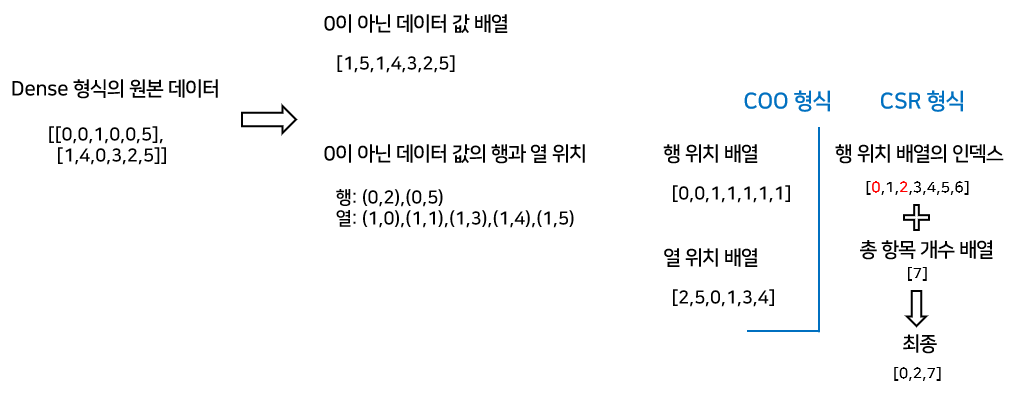

### COO 형식

In [1]:
import numpy as np
dense = np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5]])
dense

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5]])

In [6]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = [1,5,1,4,3,2,5]

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1])
col_pos = np.array([2,5,0,1,3,4,5])

# sparse 패키지의 coo_matrix를 이용하여 COO형식으로 희소행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [5]:
print(type(sparse_coo))
print(sparse_coo)
dense_1 = sparse_coo.toarray()
print(type(dense_1), '\n', dense_1)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
<class 'numpy.ndarray'> 
 [[0 0 1 0 0 5]
 [1 4 0 3 2 5]]


### CSR 형식

In [7]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = [1,5,1,4,3,2,5]

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1])
col_pos = np.array([2,5,0,1,3,4,5])

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_idx = np.array([0,2,7])  # 7: 총 행 array의 개수

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data, col_pos, row_pos_idx))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력하여 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력하여 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력하여 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력하여 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]]


In [9]:
# 하지만 위 과정 필요없이 간단하게 이렇게만 해도 COO, CSR 변환 가능
coo = sparse.coo_matrix(dense)
csr = sparse.coo_matrix(dense)
print(coo)
print('\n')
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5


  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
